Gerekli kütüphaneler aşağıda verilmiştir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from dt import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Data okunması ve anlamsız olan Id sütununun atılması görülmektedir.

In [3]:
#data = pd.read_csv("C:/Users/hasan/YAP470/Ödev1/Iris.csv")
data = pd.read_csv('heart.csv') # bulunan klasörde Iris.csv olmalı
#data = data.drop('Id', axis=1)

Tür isimlerinin dönüştürülmesi için class mapping oluşturuldu ve buna göre isimlendirmeler 0, 1, 2'ye dönüştürüldü.

In [3]:
class_mapping = {
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
}
data['Species'] = data['Species'].map(class_mapping)

Exploratory Data Analysis gerçekleştirildi. Korelasyon matrisi ve pair plots oluşturuldu. Çıkan sonuçlara baktığımızda özniteliklerden sepal width dışındakilerin birbirleriyle oldukça korelasyon içinde olduğu görüldü.

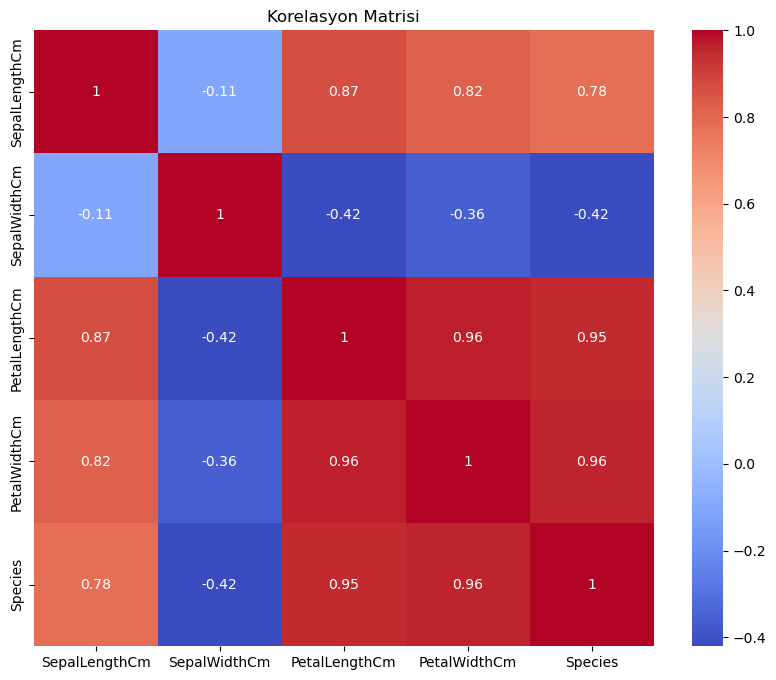

In [4]:
data_correlation = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation, annot=True, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

Pair-Plot incelendiği zaman 0 sınıfının diğerlerinden ayrı olduğu ve kolaylıkla ayrıştırılabilineceği gözlenmektedir. Diğer 2 sınıfın ortak bulunduğu noktalar olsa da onlar da büyük ölçüde ayrıştırılabilir durumdadır. Karar ağacının ilk kök noduyla 0 sınıfı direkt ayrıştırılabilir ve devamında gelen nodelar ile diğer 1 ve 2 sınıfı ayrıştırılacaktır. 2 ya da 3 derinlik ile büyük ölçüde ayrıştırılmış olacaktır.

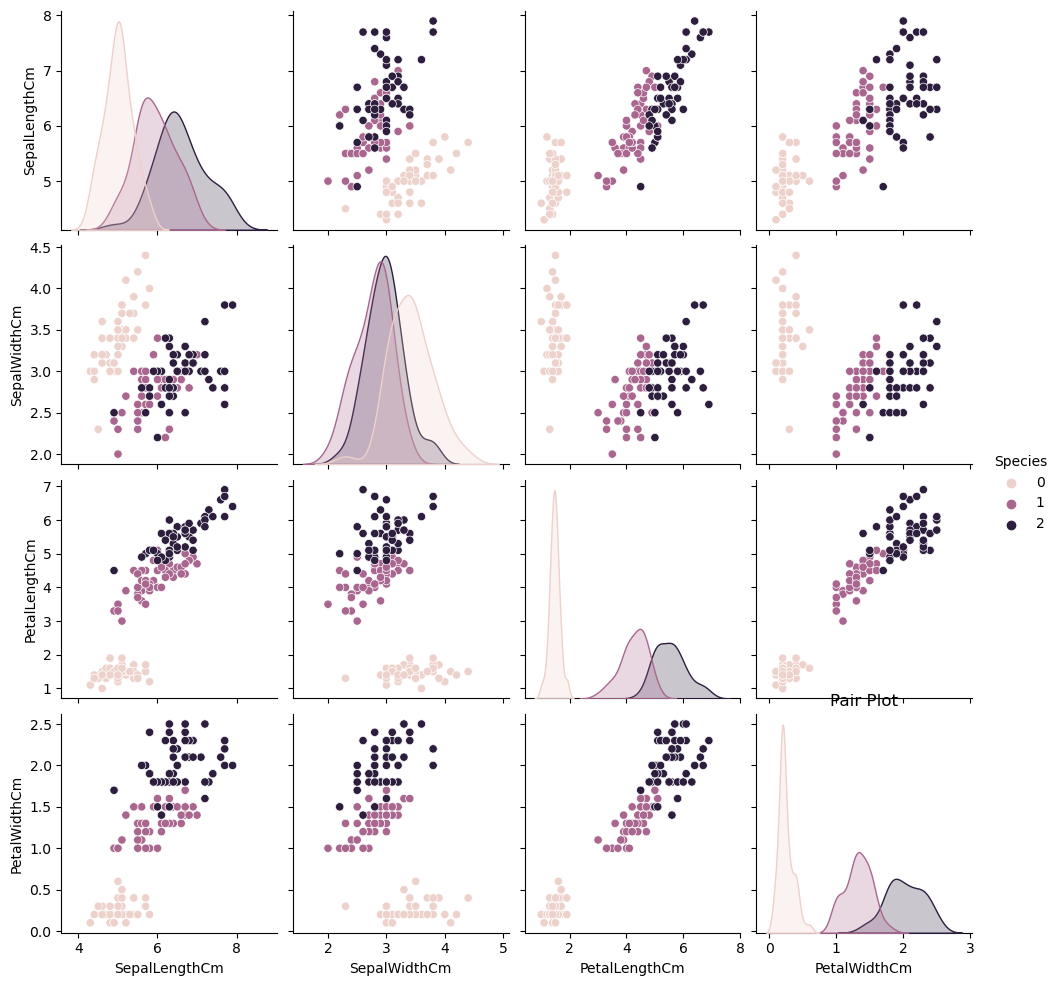

In [5]:
sns.pairplot(data, hue="Species")
plt.title("Pair Plot")
plt.show()

Data hedef ve öznitelikler matrisleri olarak ikiye ayrıldı. Test ve Eğitim seti, test setinin verinin %20'sini oluşturacak şekilde ayrılması kütüphane kullanarak sağlandı. Ayrıca sütun vektörü olarak elde edilen y verisi satır vektörüne dönüştürüldü.

In [6]:
data_list = data.values.tolist()
X = [row[:11]for row in data_list]
y = [row[11:12]for row in data_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def col_to_row(y):
    X = []
    for i in y:
        if i == [0.0]:
            X.append(0)    
        elif i == [1.0]:
            X.append(1)
        elif i == [2.0]:
            X.append(2)
    return X
y = col_to_row(y)
y_test = col_to_row(y_test)
y_train = col_to_row(y_train)

Tanımlanan DecisionTreeClasssifier class'ına göre derinliği 5 olan modelin oluşturulması görülmektedir.

In [7]:
dt_classifier = DecisionTreeClassifier(max_depth=5)

Tanımlanan DTC class'ında bulunan methodların kullanılmasıyla modelin eğitilmesi ve tahmin yapılması görülmektedir.
Özniteliklerin ve threshold değerlerinin de gözlendiği görsel bir ağaç da bastırılmıştır.

In [8]:
dt_classifier.fit(X_train, y_train)
y_pred_test = dt_classifier.predict(X_test)
y_pred_train = dt_classifier.predict(X_train)
dt_classifier.print_tree()

ValueError: could not convert string to float: 'M'

Confusion matrix oluşturulması ve test hedef verisi ile modelin tahmin ettiği test sonuçlarının karşılaştırılması görülmektedir. Accuracy, precision, recall ve f1-scor hesaplanmıştır. Bu performans ölçüm değerleri ikili sınıflandırma için doğrudan kullanılabilirken burada her bir sınıf için ayrı ayrı hesaplanıp ortalamaları 'micro' parametresine uygun olarak alınmıştır. Test verisi ile tahmin edilen sonuçlar birbirinin tamamen aynısı çıkmıştır. Performans ölçüm değerleri %100 gelmiştir.

In [9]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_test)))
print('\nPrecision: {:.2f}'.format(precision_score(y_test, y_pred_test, average='micro')))
print('\nRecall: {:.2f}'.format(recall_score(y_test, y_pred_test, average='micro')))
print('\nF1-score: {:.2f}'.format(f1_score(y_test, y_pred_test, average='micro')))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.00

Precision: 1.00

Recall: 1.00

F1-score: 1.00


Burada da daha önce test verisi için hesaplanan işlemler eğitim verisi için tekrarlanmıştır. Eğitim verisi derinliği 5 olan ağaç ile tamamen birbirinden ayrıştırılamamış olup performans ölçüm değerleri %99 gelmiştir. 2 sınıfına ait olması gereken bir veri 1 sınıfına ait olarak tahmin edilmiştir. 

In [10]:
cm_train = confusion_matrix(y_train, y_pred_train)
print(cm_train)
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_train, y_pred_train)))
print('\nPrecision: {:.2f}'.format(precision_score(y_train, y_pred_train, average='micro')))
print('\nRecall: {:.2f}'.format(recall_score(y_train, y_pred_train, average='micro')))
print('\nF1-score: {:.2f}\n'.format(f1_score(y_train, y_pred_train, average='micro')))

[[40  0  0]
 [ 0 41  0]
 [ 0  1 38]]

Accuracy: 0.99

Precision: 0.99

Recall: 0.99

F1-score: 0.99



Bir liste olarak verilen çeşitli ağaç derinliği değerleri için model tekrar tekrar eğitilmiştir. Bu modelin derinliğe karşı accuracy ve precision değerlerinin grafiği çıkarılmıştır. En iyi derinlik bu problem için 3 olarak gözlenmiştir. 

Text(0, 0.5, 'Precision')

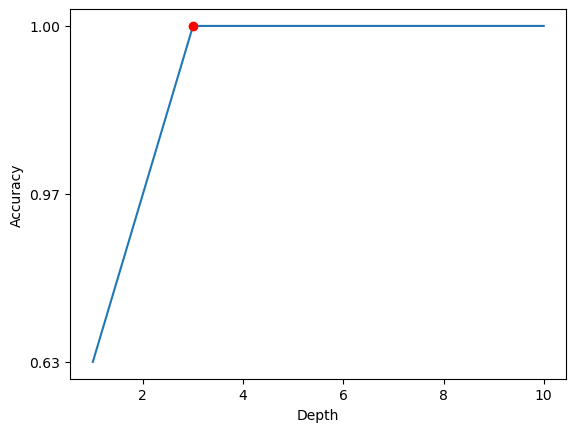

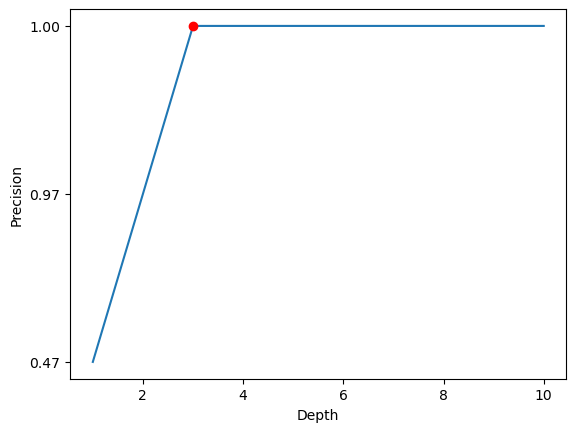

In [11]:
L = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Accuracy = []
Precisison = []
for depth in L:
    dt_classifier = DecisionTreeClassifier(max_depth=depth)
    dt_classifier.fit(X_train, y_train)
    y_pred_test = dt_classifier.predict(X_test)
    y_pred_train = dt_classifier.predict(X_train)
    Accuracy.append('{:.2f}'.format(accuracy_score(y_test, y_pred_test)))
    Precisison.append('{:.2f}'.format(precision_score(y_test, y_pred_test, average='weighted', zero_division=0)))
best_depth_ids_Acc = Accuracy.index(max(Accuracy))+1
best_depth_ids_Pre = Precisison.index(max(Precisison))+1
    
plt.plot(L, Accuracy, label='Accuracy')
plt.plot(best_depth_ids_Acc, max(Accuracy), 'ro')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.figure()
plt.plot(L, Precisison, label='Precision')
plt.plot(best_depth_ids_Pre, max(Precisison), 'ro')
plt.xlabel('Depth')
plt.ylabel('Precision')

Burada hedef verisi her sınıf için OneVsRest mantığı ile bir method kullanarak ikili veriye dönüştürülmüştür. Ayrı ayrı her sınıf için dönüştürülen bu veriler derinliği 1 olacak şekilde model ile eğitilmiştir ve hem test hem de eğitim verileri için performans ölçümleri yapılmıştır. Bu performans ölçümlerine ve test verilerine göre 0 sınıfı 1 derinlikli ağaç ile %100 ayrıştırılabilirken 1 sınıfı %67, 2 sınıfı %97 ayrıştırılabilir çıkmış olup eğitim verilerine göre ise 0 sınıfı 1 derinlikli ağaç ile %100 ayrıştırılabilirken 1 sınıfı %68, 2 sınıfı %95 ayrıştırılabilir çıkmıştır. 

In [12]:
def binarize (y, cls):
    n = []
    for i in y:
        if i == cls:
           n.append(1)
        else:
            n.append(0)
    return n
y_train_0 = binarize(y_train,0)
y_train_1 = binarize(y_train,1)
y_train_2 = binarize(y_train,2)
y_test_0 = binarize(y_test,0)
y_test_1 = binarize(y_test,1)
y_test_2 = binarize(y_test,2)
dt_classifier_0 = DecisionTreeClassifier(max_depth=1)
dt_classifier_1 = DecisionTreeClassifier(max_depth=1)
dt_classifier_2 = DecisionTreeClassifier(max_depth=1)
dt_classifier_0.fit(X_train, y_train_0)
dt_classifier_1.fit(X_train, y_train_1)
dt_classifier_2.fit(X_train, y_train_2)
y_pred_test_0 = dt_classifier_0.predict(X_test)
y_pred_test_1 = dt_classifier_1.predict(X_test)
y_pred_test_2 = dt_classifier_2.predict(X_test)
y_pred_train_0 = dt_classifier_0.predict(X_train)
y_pred_train_1 = dt_classifier_1.predict(X_train)
y_pred_train_2 = dt_classifier_2.predict(X_train)
print('\nAccuracy_test_0: {:.2f}'.format(accuracy_score(y_test_0, y_pred_test_0)))
print('\nAccuracy_test_1: {:.2f}'.format(accuracy_score(y_test_1, y_pred_test_1)))
print('\nAccuracy_test_2: {:.2f}'.format(accuracy_score(y_test_2, y_pred_test_2)))
print('\nAccuracy_train_0: {:.2f}'.format(accuracy_score(y_train_0, y_pred_train_0)))
print('\nAccuracy_train_1: {:.2f}'.format(accuracy_score(y_train_1, y_pred_train_1)))
print('\nAccuracy_train_2: {:.2f}'.format(accuracy_score(y_train_2, y_pred_train_2)))


Accuracy_test_0: 1.00

Accuracy_test_1: 0.63

Accuracy_test_2: 0.97

Accuracy_train_0: 1.00

Accuracy_train_1: 0.68

Accuracy_train_2: 0.95


Burada yukarıda kullanılan DCT class'ında predict_proba methodu tanımlanamadığı için Scikit-Learn kütüphanesinin DCT class'ı kullanılmıştır. 3 class için de ayrı ayrı derinliği 1 olan DCT ile model eğitilmiş olup ROC eğrileri çizilmiştir ve AUC değerleri hesaplanmıştır. Önceden de 0 sınıfının rahatlıkla ayrıştırılabildiği görüldüğü üzere burada 0 sınıfının eğri altındaki alan değeri 1 gelmiştir. 0 sınıfından sonra en iyi ayrıştırılabilen 2 sınıfının ise 0.92 geldiği gözlenmiştir. Ortalarında bulunan ve nispeten ayrıştırılması zor olan 1 sınıfının ise 0.82 geldiği görülmektedir.  

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
"""
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

classifier = OneVsRestClassifier(DecisionTreeClassifier(max_depth=1))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.fit(X_train, y_train).predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()"""


'\ny = label_binarize(y, classes=[0, 1, 2])\nn_classes = y.shape[1]\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)\n\nclassifier = OneVsRestClassifier(DecisionTreeClassifier(max_depth=1))\n\nfpr = dict()\ntpr = dict()\nroc_auc = dict()\nfor i in range(n_classes):\n    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], classifier.fit(X_train, y_train).predict_proba(X_test)[:, i])\n    roc_auc[i] = auc(fpr[i], tpr[i])\n\nplt.figure()\nfor i in range(n_classes):\n    plt.plot(fpr[i], tpr[i], label=\'ROC curve of class {0} (area = {1:0.2f})\'.format(i, roc_auc[i]))\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Multi-class ROC Curve\')\nplt.legend(loc="lower right")\nplt.show()'